Calculate ensemble of sea level projections

In [1]:
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')

from alldata import AllData
from ensemble import EnsembleMember,FullEnsemble

np.set_printoptions(precision=2)
%matplotlib notebook
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}
%load_ext autoreload
%autoreload 2

Read data

In [2]:
ad = AllData()
ad.usefanom = True
ad.gather(update=False)
#Select subsection of models for rapid calculation
#ad.ds = ad.ds.isel(ism=slice(0,2),esm=slice(0,2))

fe = FullEnsemble(ad)
fe.cal = 'S'
fe.nonlin = 'cutoff'
fe.gather(force_update=True)

Gathered all data
Doing a forced update of ensemble calculation:  ../data/ensemble_calS_cutoff_1951.nc
ACCESS-CM2 CISM_NCA [6.   5.24] [3.34 3.17 3.02] [2.37 2.31 2.23]                           
ACCESS-CM2 FETI_ULB [3.19 2.95] [3.35 3.29 3.34] [2.71 2.7  2.76]                           
ACCESS-CM2 GRIS_LSC [nan nan] [nan nan nan] [nan nan nan]                           
ACCESS-CM2 IMAU_UU [1.82 1.52] [1.31 1.31 1.31] [1.03 1.03 1.03]                           
ACCESS-CM2 ISSM_UCI [1.82 1.76] [1.09 1.1  1.1 ] [1.05 1.06 1.06]                           
ACCESS-CM2 MALI_DOE [4.15 3.66] [2.12 2.06 2.  ] [1.63 1.61 1.57]                           
ACCESS-CM2 PISM_DMI [2.62 1.73] [7.25 6.37 5.69] [2.4  2.22 2.13]                           
ACCESS-CM2 PISM_PIK [15.92  6.44] [-0.99 -0.57  0.07] [1.14 1.11 1.07]                           
ACCESS-CM2 SICO_ILTS [2.23 2.05] [1.5  1.51 1.5 ] [1.32 1.32 1.32]                           
CAMS-CSM1-0 CISM_NCA [5.73 3.43] [5.33 4.98 4.72] [1.23 1.23 1.

Figure settings

In [14]:
plt.style.use('../src/style_paper')
mpl.rc('figure.subplot',left=.15,bottom=.2)

alpha = .3 #Transparency of uncertainty range
perc = [17,83] #Percentiles of uncertainty range

Make and save figure

88
126 SLR_amp br 1.58911445140275
126 SLR_amp ar 1.146812752977112
88
245 SLR_amp br 1.7650309321532291
245 SLR_amp ar 1.0743068717589452
88
585 SLR_amp br 1.7712654976101037
585 SLR_amp ar 1.129743287696795


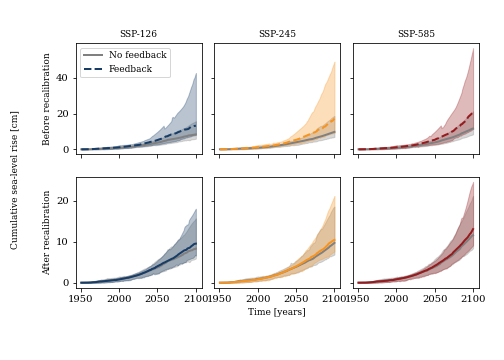

In [15]:
fig,ax = plt.subplots(2,3,sharex=True,sharey='row',figsize=(7,5))

for s,ss in enumerate(ad.ssp):
    print(np.sum(~np.isnan(fe.gamma[0,:,:].values)))    
    
    #Plot no feedback
    for a in [0,1]:
        ax[a,s].plot(fe.time,100*np.nanmedian(fe.slr[0,s,:,:,:],axis=(0,1)),c='.5',lw=2,label='No feedback')
        ax[a,s].fill_between(fe.time,100*np.nanpercentile(fe.slr[0,s,:,:,:],perc[0],axis=(0,1)),100*np.nanpercentile(fe.slr[0,s,:,:,:],perc[1],axis=(0,1)),color='.5',alpha=alpha)#,label=perc)

    #Plot with feedback
    ax[0,s].plot(fe.time,100*np.nanmedian(fe.slr[1,s,:,:,:],axis=(0,1)),'--',c=ad.scol[ss],lw=2,label='Feedback')
    ax[0,s].fill_between(fe.time,100*np.nanpercentile(fe.slr[1,s,:,:,:],perc[0],axis=(0,1)),100*np.nanpercentile(fe.slr[1,s,:,:,:],perc[1],axis=(0,1)),color=ad.scol[ss],alpha=alpha)

    #Plot with feedback
    ax[1,s].plot(fe.time,100*np.nanmedian(fe.slr[2,s,:,:,:],axis=(0,1)),c=ad.scol[ss],lw=2,label='Feedback')
    ax[1,s].fill_between(fe.time,100*np.nanpercentile(fe.slr[2,s,:,:,:],perc[0],axis=(0,1)),100*np.nanpercentile(fe.slr[2,s,:,:,:],perc[1],axis=(0,1)),color=ad.scol[ss],alpha=alpha)
    
    ax[0,s].set_title(f'SSP-{ss}')
    
    print(ss,'SLR_amp','br',np.nanmedian(fe.slr[1,s,:,:,:],axis=(0,1))[-1]/(np.nanmedian(fe.slr[0,s,:,:,:],axis=(0,1))[-1]))
    print(ss,'SLR_amp','ar',np.nanmedian(fe.slr[2,s,:,:,:],axis=(0,1))[-1]/(np.nanmedian(fe.slr[0,s,:,:,:],axis=(0,1))[-1]))
    
ax[0,0].legend(loc='upper left')
fig.supylabel('Cumulative sea-level rise [cm]')
ax[0,0].set_ylabel('Before recalibration',fontsize=9)
ax[1,0].set_ylabel('After recalibration',fontsize=9)
ax[1,1].set_xlabel('Time [years]')

plt.savefig(f'../draftfigs/full_ensemble_cal{fe.cal}_{fe.nonlin}_{fe.year0}.png',dpi=450,facecolor='w',transparent=False)
plt.show()